In [42]:
import pandas as pd
rumah = {
    'luas': [50, 60, 70, 80, 90, 100],
    'harga': [150, 200, 250, 300, 350, 400]
}
rumah_df = pd.DataFrame(rumah)
rumah_df

,luas,harga
0,50,150
1,60,200
2,70,250
3,80,300
4,90,350
5,100,400


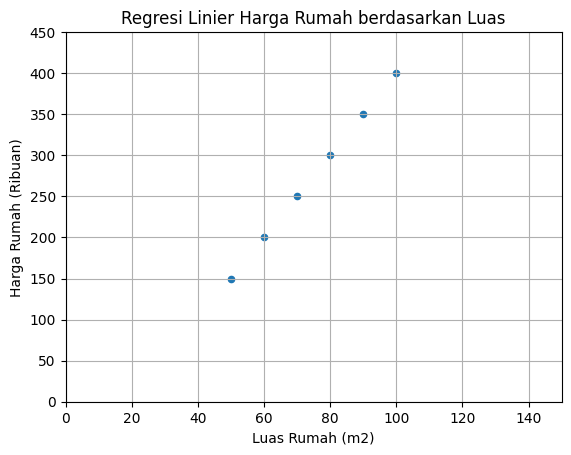

In [43]:
import matplotlib.pyplot as plt

rumah_df.plot (kind='scatter', x='luas', y='harga')

plt.title('Perbandingan Luas dan Harga Rumah')
plt.xlabel('Luas Rumah (m2)')
plt.ylabel('Harga Rumah (Ribuan)')
plt.title('Regresi Linier Harga Rumah berdasarkan Luas')
plt.xlim (0,150)
plt.ylim (0,450)
plt.grid(True)
plt.show()

In [44]:
import numpy as np

x = np.array(rumah_df['luas'])
y = np.array(rumah_df['harga'])

print(f'x: {x}')
print(f'y: {y}')

x: [ 50  60  70  80  90 100]
y: [150 200 250 300 350 400]


In [45]:
x = x.reshape(-1,1)
x.shape



(6, 1)

In [46]:
print(f'x: {x}')

x: [[ 50]
 [ 60]
 [ 70]
 [ 80]
 [ 90]
 [100]]


In [47]:
!pip install scikit-learn

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [49]:
x_vis = np.array([0, 150]).reshape(-1,1)
y_vis = model.predict(x_vis)

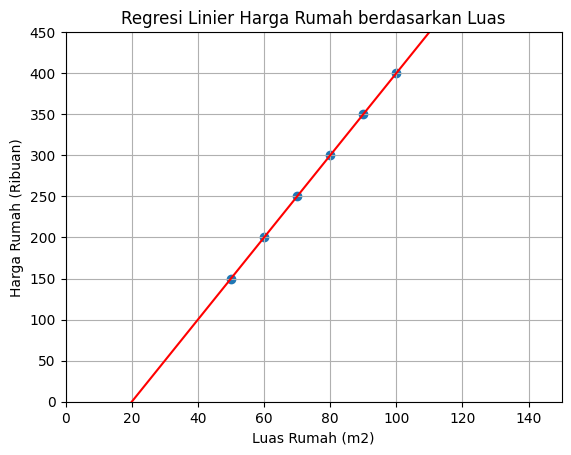

In [50]:
plt.scatter(x,y)
plt.plot(x_vis, y_vis, '-r')

plt.title('Perbandingan Luas dan Harga Rumah')
plt.xlabel('Luas Rumah (m2)')
plt.ylabel('Harga Rumah (Ribuan)')
plt.title('Regresi Linier Harga Rumah berdasarkan Luas')
plt.xlim (0,150)
plt.ylim (0,450)
plt.grid(True)
plt.show()

In [51]:
print (f'intercept: {model.intercept_}')
print (f'slope : {model.coef_}')

intercept: -100.00000000000006
slope : [5.]


In [52]:
print(f'x:n\{x}\n')
print(f'x flatten {x.flatten()}\n')
print(f'y : {y}')

x:n\[[ 50]
 [ 60]
 [ 70]
 [ 80]
 [ 90]
 [100]]

x flatten [ 50  60  70  80  90 100]

y : [150 200 250 300 350 400]


In [53]:
variance_x = np.var(x.flatten(), ddof=1)
print(f'variance : {variance_x}')

variance : 350.0


In [54]:
np.cov(x.flatten(),y)
print(f'variance : {variance_x}')

variance : 350.0


In [55]:
covariance_xy = np.cov(x.transpose(), y)[0][1]
print(f'covariance_xy: {covariance_xy}')

covariance_xy: 1750.0


In [56]:
slope =covariance_xy / variance_x

print(f'slope: {slope}')

slope: 5.0


In [57]:
intercept = np.mean(y) - slope * np.mean(x)
print(f'intercept: {intercept}')

intercept: -100.0


In [58]:
luas_rumah = np.array([55,65,75]).reshape(-1,1)
luas_rumah

array([[55],
       [65],
       [75]])

In [59]:
prediksi_harga = model.predict(luas_rumah)
prediksi_harga

array([175., 225., 275.])

In [60]:
for luas, hrg in zip ( luas_rumah, prediksi_harga):
    print(f'Harga rumah dengan luas {luas} m2 adalah {hrg}')

Harga rumah dengan luas [55] m2 adalah 175.0
Harga rumah dengan luas [65] m2 adalah 225.0
Harga rumah dengan luas [75] m2 adalah 275.0


In [75]:
x_train = np.array([50, 60, 70, 80, 90, 100]).reshape(-1,1)
y_train = np.array([150, 200, 250, 300, 350, 400])

x_test = np.array([50, 65, 85,95,105]).reshape(-1,1)
y_test = np.array([160, 210, 260, 310, 360])

In [76]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [77]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.47999999999999976


In [78]:
ss_res = sum([y_i - model.predict( x_i.reshape(-1,1))[0]**2
              for x_i, y_i in zip(x_test, y_test)])

print(f'ss_res : {ss_res}')

ss_res : -498700.00000000006


In [79]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])
print(f'ss_tot: {ss_tot}')

ss_tot: 25000.0


In [80]:
r_squared = 1 - (ss_res/ss_tot)

print(f'R-squard : {r_squared}')


R-squard : 20.948000000000004
